#TER ÉTAPE 4

In [18]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

#  1 - CLASSIFICATION 
DATASET : Planetes

---

In [19]:
bd = pd.read_csv("/content/planetes.csv")
bd.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [20]:
#on vérifie si des données sont manquantes
bd.isnull().sum().sort_values(ascending=False)

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [21]:
#On remplace les valeurs catégorique par des valeurs numériques
for t in bd.columns:
 map_values={}
 cmpt = 0
 if bd[t].dtype == object:
  for i in bd[t].unique():
    map_values[i] = cmpt
    cmpt += 1
  bd[t] = bd[t].map(map_values)

In [22]:
#la cible est le type d'étoile
target = bd['Star type']
bd.drop('Star type',axis=1,inplace=True)

#  2 - REGRESSION
DATASET : Prix des laptops

---

In [23]:
pl = pd.read_csv("/content/laptop_price.csv",encoding='latin-1')
pl.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [24]:
#on vérifie si des données sont manquantes
pl.isnull().sum().sort_values(ascending=False)

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [25]:
#On remplace les valeurs catégorique par des valeurs numériques
for t in pl.columns:
 map_values={}
 cmpt = 0
 if pl[t].dtype == object:
  for i in pl[t].unique():
    map_values[i] = cmpt
    cmpt += 1
  pl[t] = pl[t].map(map_values)

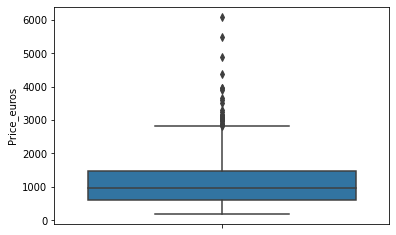

In [26]:
#on voit qu'il y a des valeurs aberrantes
sbn.boxplot(y=pl['Price_euros'],data=pl)

In [27]:
#fct qui trouve toutes les données aberrantes pour une colonne
def trouver_prix_aberrants(data,var):
  iqr=data[var].quantile(0.75)-data[var].quantile(0.25)
  Q1=data[var].quantile(0.25)
  Q3=data[var].quantile(0.75)
  upper=Q3+1.5*iqr
  lower=Q1-1.5*iqr
  return data[(data[var]<lower)|(data[var]>upper)].laptop_ID

In [28]:
#on supprime les données aberrantes
aberrants = trouver_prix_aberrants(pl,'Price_euros').tolist()
len(aberrants)#peu nombreuse les enlever n'affectera pas le modèle

29

In [29]:
while len(aberrants) != 0:
  aberrants = trouver_prix_aberrants(pl,'Price_euros').tolist()
  for i in aberrants:
    pl.drop(pl[pl['laptop_ID'] == i].index,inplace=True)

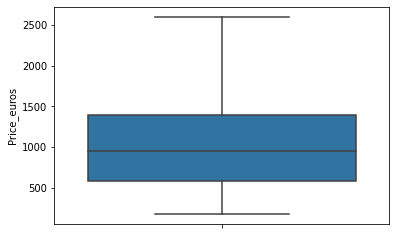

In [30]:
#plus de valeurs aberrantes
sbn.boxplot(y=pl['Price_euros'],data=pl)

In [31]:
#la cible à prédire c'est le prix du laptop
target = pl['Price_euros']
pl.drop('Price_euros',axis=1,inplace=True)
pl.drop('laptop_ID',axis=1,inplace=True)#inutile